># Data Visualization Solution

### 1) Display the Flight path bewtween Newyork city and LA in United States Map.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

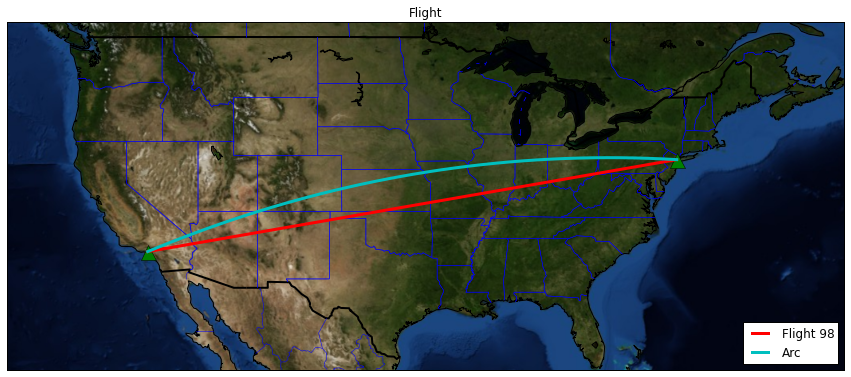

In [17]:
plt.figure(figsize=(15,9))
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

m = Basemap(projection='mill',
            llcrnrlat = 25,
            llcrnrlon = -130,
            urcrnrlat = 50,
            urcrnrlon = -60,
            resolution='l')

m.drawcoastlines()
m.drawcountries(linewidth=2)
m.drawstates(color='b')
#m.drawcounties(color='darkred')
#m.fillcontinents()
#m.etopo()
m.bluemarble()

xs = []
ys = []

NYClat, NYClon = 40.7127, -74.0059
xpt, ypt = m(NYClon, NYClat)
xs.append(xpt)
ys.append(ypt)
m.plot(xpt, ypt, 'g^', markersize=15)

LAlat, LAlon = 34.05, -118.25
xpt, ypt = m(LAlon, LAlat)
xs.append(xpt)
ys.append(ypt)
m.plot(xpt, ypt, 'g^', markersize=15)

m.plot(xs, ys, color='r', linewidth=3, label='Flight 98')
m.drawgreatcircle(NYClon, NYClat, LAlon, LAlat, color='c', linewidth=3, label='Arc')


plt.legend(loc=4)
plt.title('Flight')
plt.show()

### 2) Plot Bar graph for Total sales by customer and sales break down by category for given data set 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
sales=pd.read_csv("/resources/sample-sales.csv",parse_dates=['date'])
sales.head()

,account number,name,sku,category,quantity,unit price,ext price,date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:00
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:00
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:00
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:00
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:00


In [8]:
customers = sales[['name','category','ext price','date']]
customers.head()

,name,category,ext price,date
0,Carroll PLC,Belt,578.24,2014-09-27 07:13:00
1,Heidenreich-Bosco,Shoes,1018.78,2014-07-29 02:10:00
2,"Kerluke, Reilly and Bechtelar",Shirt,289.92,2014-03-01 10:51:00
3,Waters-Walker,Shirt,413.40,2013-11-17 20:41:00
4,Waelchi-Fahey,Shirt,1793.52,2014-01-03 08:14:00


In [9]:
category_group=customers.groupby(['name','category']).sum()
category_group.head()

ext price
name        category           
Berge LLC   Belt        6033.53
            Shirt       9670.24
            Shoes      14361.10
Carroll PLC Belt        9359.26
            Shirt      13717.61

In [11]:
category_group.unstack().head()

ext price                    
category                          Belt     Shirt     Shoes
name                                                      
Berge LLC                      6033.53   9670.24  14361.10
Carroll PLC                    9359.26  13717.61  12857.44
Cole-Eichmann                  8112.70  14528.01   7794.71
Davis, Kshlerin and Reilly     1604.13   7533.03   9917.60
Ernser, Cruickshank and Lind   5894.38  16944.19   5250.45

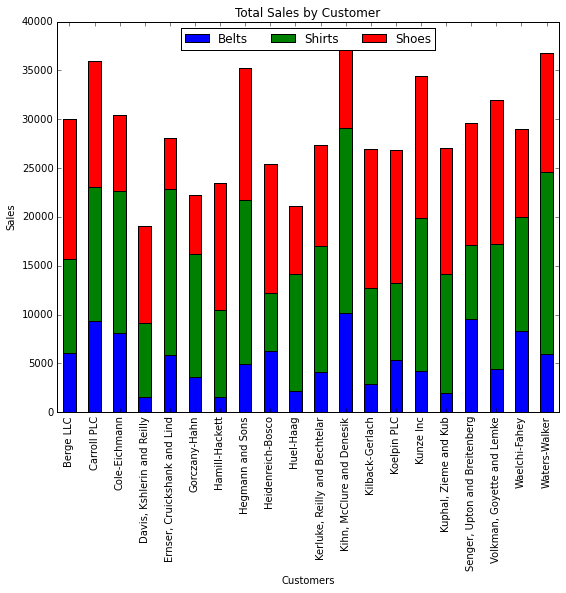

In [16]:
my_plot = category_group.unstack().plot(kind='bar',stacked=True,title="Total Sales by Customer",figsize=(9, 7))
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales")
my_plot.legend(["Belts","Shirts","Shoes"], loc=9,ncol=4)

### 3) Plot histogram to show the distribution of purchasing patterns.

In [18]:
purchase_patterns = sales[['ext price','date']]
purchase_patterns.head()

,ext price,date
0,578.24,2014-09-27 07:13:00
1,1018.78,2014-07-29 02:10:00
2,289.92,2014-03-01 10:51:00
3,413.40,2013-11-17 20:41:00
4,1793.52,2014-01-03 08:14:00


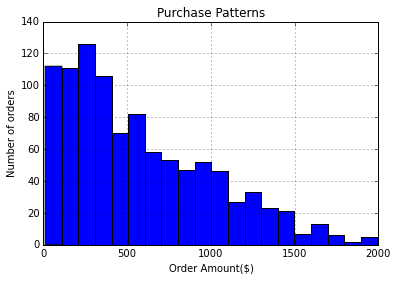

In [19]:
purchase_plot = purchase_patterns['ext price'].hist(bins=20)
purchase_plot.set_title("Purchase Patterns")
purchase_plot.set_xlabel("Order Amount($)")
purchase_plot.set_ylabel("Number of orders")

### 4) Plot line graph to show by sales over time.

In [20]:
purchase_patterns = sales[['ext price','date']]
purchase_patterns.head()

,ext price,date
0,578.24,2014-09-27 07:13:00
1,1018.78,2014-07-29 02:10:00
2,289.92,2014-03-01 10:51:00
3,413.40,2013-11-17 20:41:00
4,1793.52,2014-01-03 08:14:00


In [21]:
purchase_patterns = purchase_patterns.set_index('date')
purchase_patterns.head()

,ext price
date,
2014-09-27 07:13:00,578.24
2014-07-29 02:10:00,1018.78
2014-03-01 10:51:00,289.92
2013-11-17 20:41:00,413.40
2014-01-03 08:14:00,1793.52


In [22]:
purchase_patterns.resample('M',how=sum)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  if __name__ == '__main__':


,ext price
date,
2013-10-31,14085.27
2013-11-30,44932.78
2013-12-31,57752.23
2014-01-31,53161.35
2014-02-28,51783.56
2014-03-31,44991.85
2014-04-30,34098.05
2014-05-31,50001.02
2014-06-30,37477.65


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  if __name__ == '__main__':


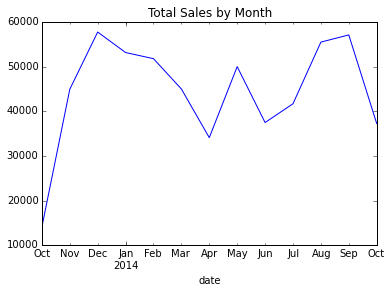

In [23]:
purchase_plot = purchase_patterns.resample('M',how=sum).plot(title="Total Sales by Month",legend=None)

### 5) Plot a scatter plot to show the relationship between the engine size and co2 emmissions.

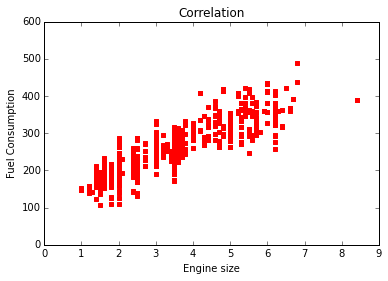

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("/resources/data/FuelConsumption.csv")
df.head()
x= df['ENGINESIZE']
y= df['CO2EMISSIONS']
plt.title('Correlation')
plt.xlabel('Engine size')
plt.ylabel('Fuel Consumption')
plt.scatter (x, y, color='r', marker='s', s=10)
plt.show()

<hr>
Notebook created by: Helly Patel